Images found: 400
Masks found: 400
Image size: (736, 960, 3), type: uint8
RGB ask size: (736, 960, 3), type: uint8
New indexed mask shape: (736, 960), typ: uint8
Unique classes in a new mask: [0 2 3 4]


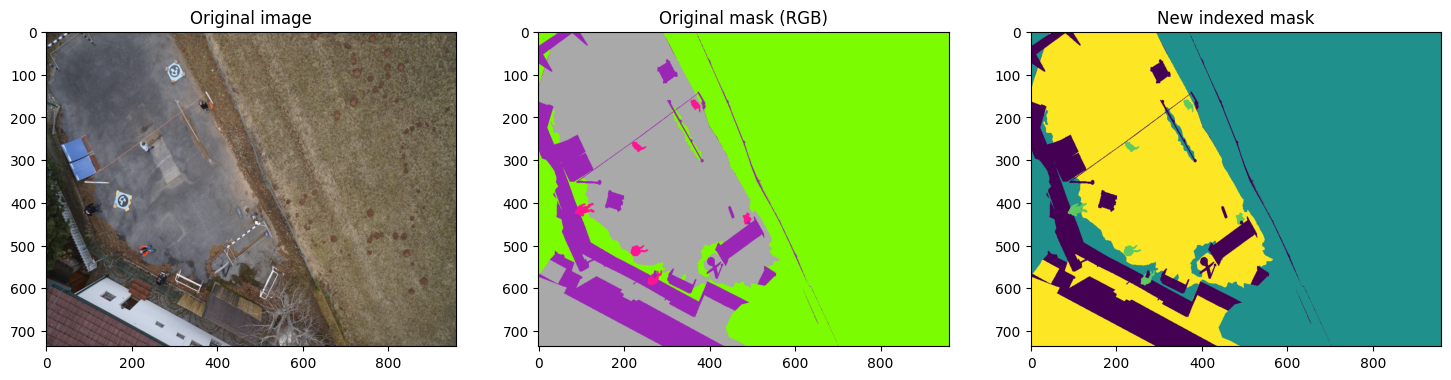

In [19]:
import glob
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

IMG_PATH: str = "../data/raw/classes_dataset/original_images"
MASK_PATH: str = "../data/raw/classes_dataset/label_images_semantic/"

image_files: list[str] = sorted(glob.glob(os.path.join(IMG_PATH, "*.png")))
mask_files: list[str] = sorted(glob.glob(os.path.join(MASK_PATH, "*.png")))

ColorMapType = tuple[int, int, int]

print(f"Images found: {len(image_files)}")
print(f"Masks found: {len(mask_files)}")
# Color map: [R, G, B]
color_map: dict[ColorMapType, int] = {
    (155, 38, 182): 0,  # obstacles
    (14, 135, 204): 1,  # water
    (124, 252, 0): 2,  # soft-surfaces
    (255, 20, 147): 3,  # moving-objects
    (169, 169, 169): 4,  # landing-zones
}

colors_rgb: np.array = np.array(
    [[155, 38, 182], [14, 135, 204], [124, 252, 0], [255, 20, 147], [169, 169, 169]], dtype=np.uint8
)

class_ids: np.array = np.array([0, 1, 2, 3, 4], dtype=np.uint8)


def convert_rgb_to_index_mask(rgb_mask: np.array) -> np.array:
    """
    Convert a RGB mask (height, width, 3) into an indexed mask (height, width).
    """
    height, width, _ = rgb_mask.shape
    index_mask: np.array = np.zeros((height, width), dtype=np.uint8)
    for i, color in enumerate(colors_rgb):
        matches = (rgb_mask == color).all(axis=2)
        index_mask[matches] = class_ids[i]
    return index_mask


if len(image_files) > 0:
    img_bgr: np.array = cv2.imread(image_files[150])
    img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    mask_bgr: np.array = cv2.imread(mask_files[150])
    mask_rgb: np.array = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)

    print(f"Image size: {img_rgb.shape}, type: {img_rgb.dtype}")
    print(f"RGB ask size: {mask_rgb.shape}, type: {mask_rgb.dtype}")

    mask_index: np.array = convert_rgb_to_index_mask(mask_rgb)

    print(f"New indexed mask shape: {mask_index.shape}, typ: {mask_index.dtype}")
    print(f"Unique classes in a new mask: {np.unique(mask_index)}")

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].imshow(img_rgb)
    ax[0].set_title("Original image")

    ax[1].imshow(mask_rgb)
    ax[1].set_title("Original mask (RGB)")

    ax[2].imshow(mask_index, cmap="viridis", vmin=0, vmax=4)
    ax[2].set_title("New indexed mask")

    plt.show()

Class distribution started (it could take a while)...


Analyzing masks: 100%|██████████| 400/400 [00:31<00:00, 12.50it/s]


Number of pixels that were analyzed: 282624000
Pixel distribution per class:
  ID 0 (obstacles): 25357858 pixels (8.9723%)
  ID 1 (water): 8066536 pixels (2.8542%)
  ID 2 (soft-surfaces): 95179194 pixels (33.6770%)
  ID 3 (moving-objects): 5848295 pixels (2.0693%)
  ID 4 (landing-zones): 148172117 pixels (52.4273%)


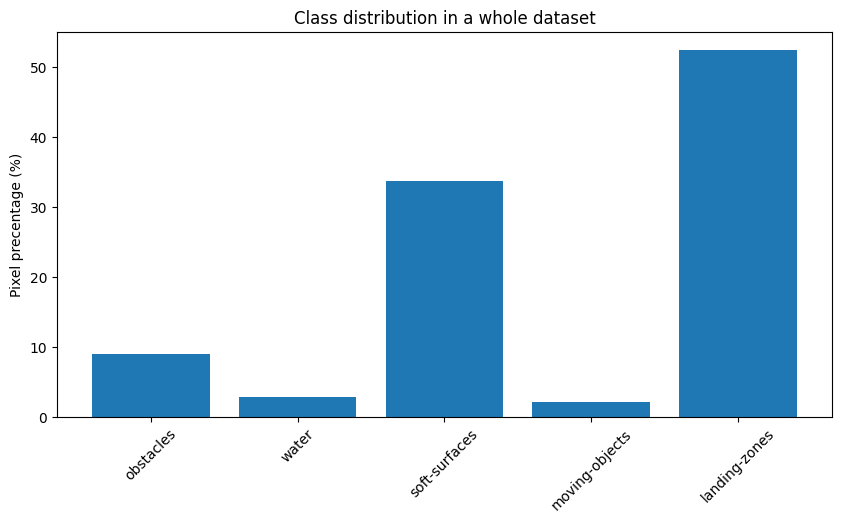

In [ ]:
from collections import defaultdict

from tqdm import tqdm

print("Class distribution started (it could take a while)...")

colors_rgb_list: list[ColorMapType] = [
    (155, 38, 182),
    (14, 135, 204),
    (124, 252, 0),
    (255, 20, 147),
    (169, 169, 169),
]
class_ids_list: list[int] = [0, 1, 2, 3, 4]

total_pixel_counts: dict[int, int] = defaultdict(int)

for mask_file in tqdm(mask_files, desc="Analyzing masks"):
    mask_bgr: np.array = cv2.imread(mask_file)
    if mask_bgr is None:
        print(f"Could not load mask: {mask_file}")
        continue

    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)

    # Convert to indexed mask
    height, width, _ = mask_rgb.shape
    mask_index = np.zeros((height, width), dtype=np.uint8)

    for i, color in enumerate(colors_rgb_list):
        matches: np.ndarray = (mask_rgb == color).all(axis=2)
        mask_index[matches] = class_ids_list[i]

    unique_values, counts = np.unique(mask_index, return_counts=True)

    for value, count in zip(unique_values, counts):
        total_pixel_counts[value] += count

total_pixels = sum(total_pixel_counts.values())
class_names = ["obstacles", "water", "soft-surfaces", "moving-objects", "landing-zones"]

print(f"Number of pixels that were analyzed: {total_pixels}")
print("Pixel distribution per class:")

class_percentages = {}
for class_id, class_name in enumerate(class_names):
    count = total_pixel_counts[class_id]
    percentage = (count / total_pixels) * 100
    class_percentages[class_name] = percentage
    print(f"  ID {class_id} ({class_name}): {count} pixels ({percentage:.4f}%)")

plt.figure(figsize=(10, 5))
plt.bar(class_percentages.keys(), class_percentages.values())
plt.title("Class distribution in a whole dataset")
plt.ylabel("Pixel precentage (%)")
plt.xticks(rotation=45)
plt.show()

Analysing image sizes...


Checking images sizes: 100%|██████████| 400/400 [00:09<00:00, 43.54it/s]



--- IMAGE SIZE STATISTICS ---
       height  width  channels
count   400.0  400.0     400.0
mean    736.0  960.0       3.0
std       0.0    0.0       0.0
min     736.0  960.0       3.0
25%     736.0  960.0       3.0
50%     736.0  960.0       3.0
75%     736.0  960.0       3.0
max     736.0  960.0       3.0


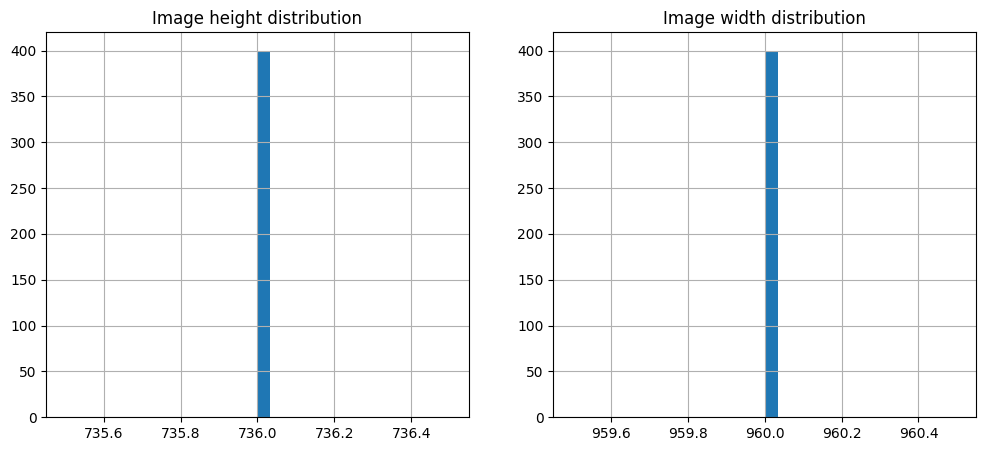

In [ ]:
import pandas as pd

print("Analysing image sizes...")
image_shapes = []
for img_file in tqdm(image_files, desc="Checking images sizes"):
    img = cv2.imread(img_file)
    if img is not None:
        image_shapes.append(img.shape)

df_shapes = pd.DataFrame(image_shapes, columns=["height", "width", "channels"])
print("\n--- IMAGE SIZE STATISTICS ---")
print(df_shapes.describe())

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df_shapes["height"].hist(ax=ax[0], bins=30)
ax[0].set_title("Image height distribution")
df_shapes["width"].hist(ax=ax[1], bins=30)
ax[1].set_title("Image width distribution")
plt.show()

In [ ]:
print("Verifying masks colors...")

known_colors_set = set(colors_rgb_list)
unknown_colors_found = defaultdict(int)

for mask_file in tqdm(mask_files[:100], desc="Veryfying masks colors (on a subset of 100 masks)"):
    mask_bgr = cv2.imread(mask_file)
    if mask_bgr is None:
        continue
    mask_rgb: np.array = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    unique_colors: np.ndarray = np.unique(mask_rgb.reshape(-1, 3), axis=0)

    for color in unique_colors:
        color_tuple = tuple(color)
        if color_tuple not in known_colors_set:
            unknown_colors_found[color_tuple] += 1

if not unknown_colors_found:
    print("All the colors in masks are defined with one of the five classes.")
else:
    print("\n--- WARNING: An unknown color has been found in a mask ---")
    for color, count in unknown_colors_found.items():
        print(f"  Color {color} found in {count} masks.")
    print("You need to decide what to do with the colors (ignore or map to one of the classes).")

Verifying masks colors...


Veryfying masks colors (on a subset of 100 masks): 100%|██████████| 100/100 [01:05<00:00,  1.53it/s]

All the colors in masks are defined with oneof the five classes.


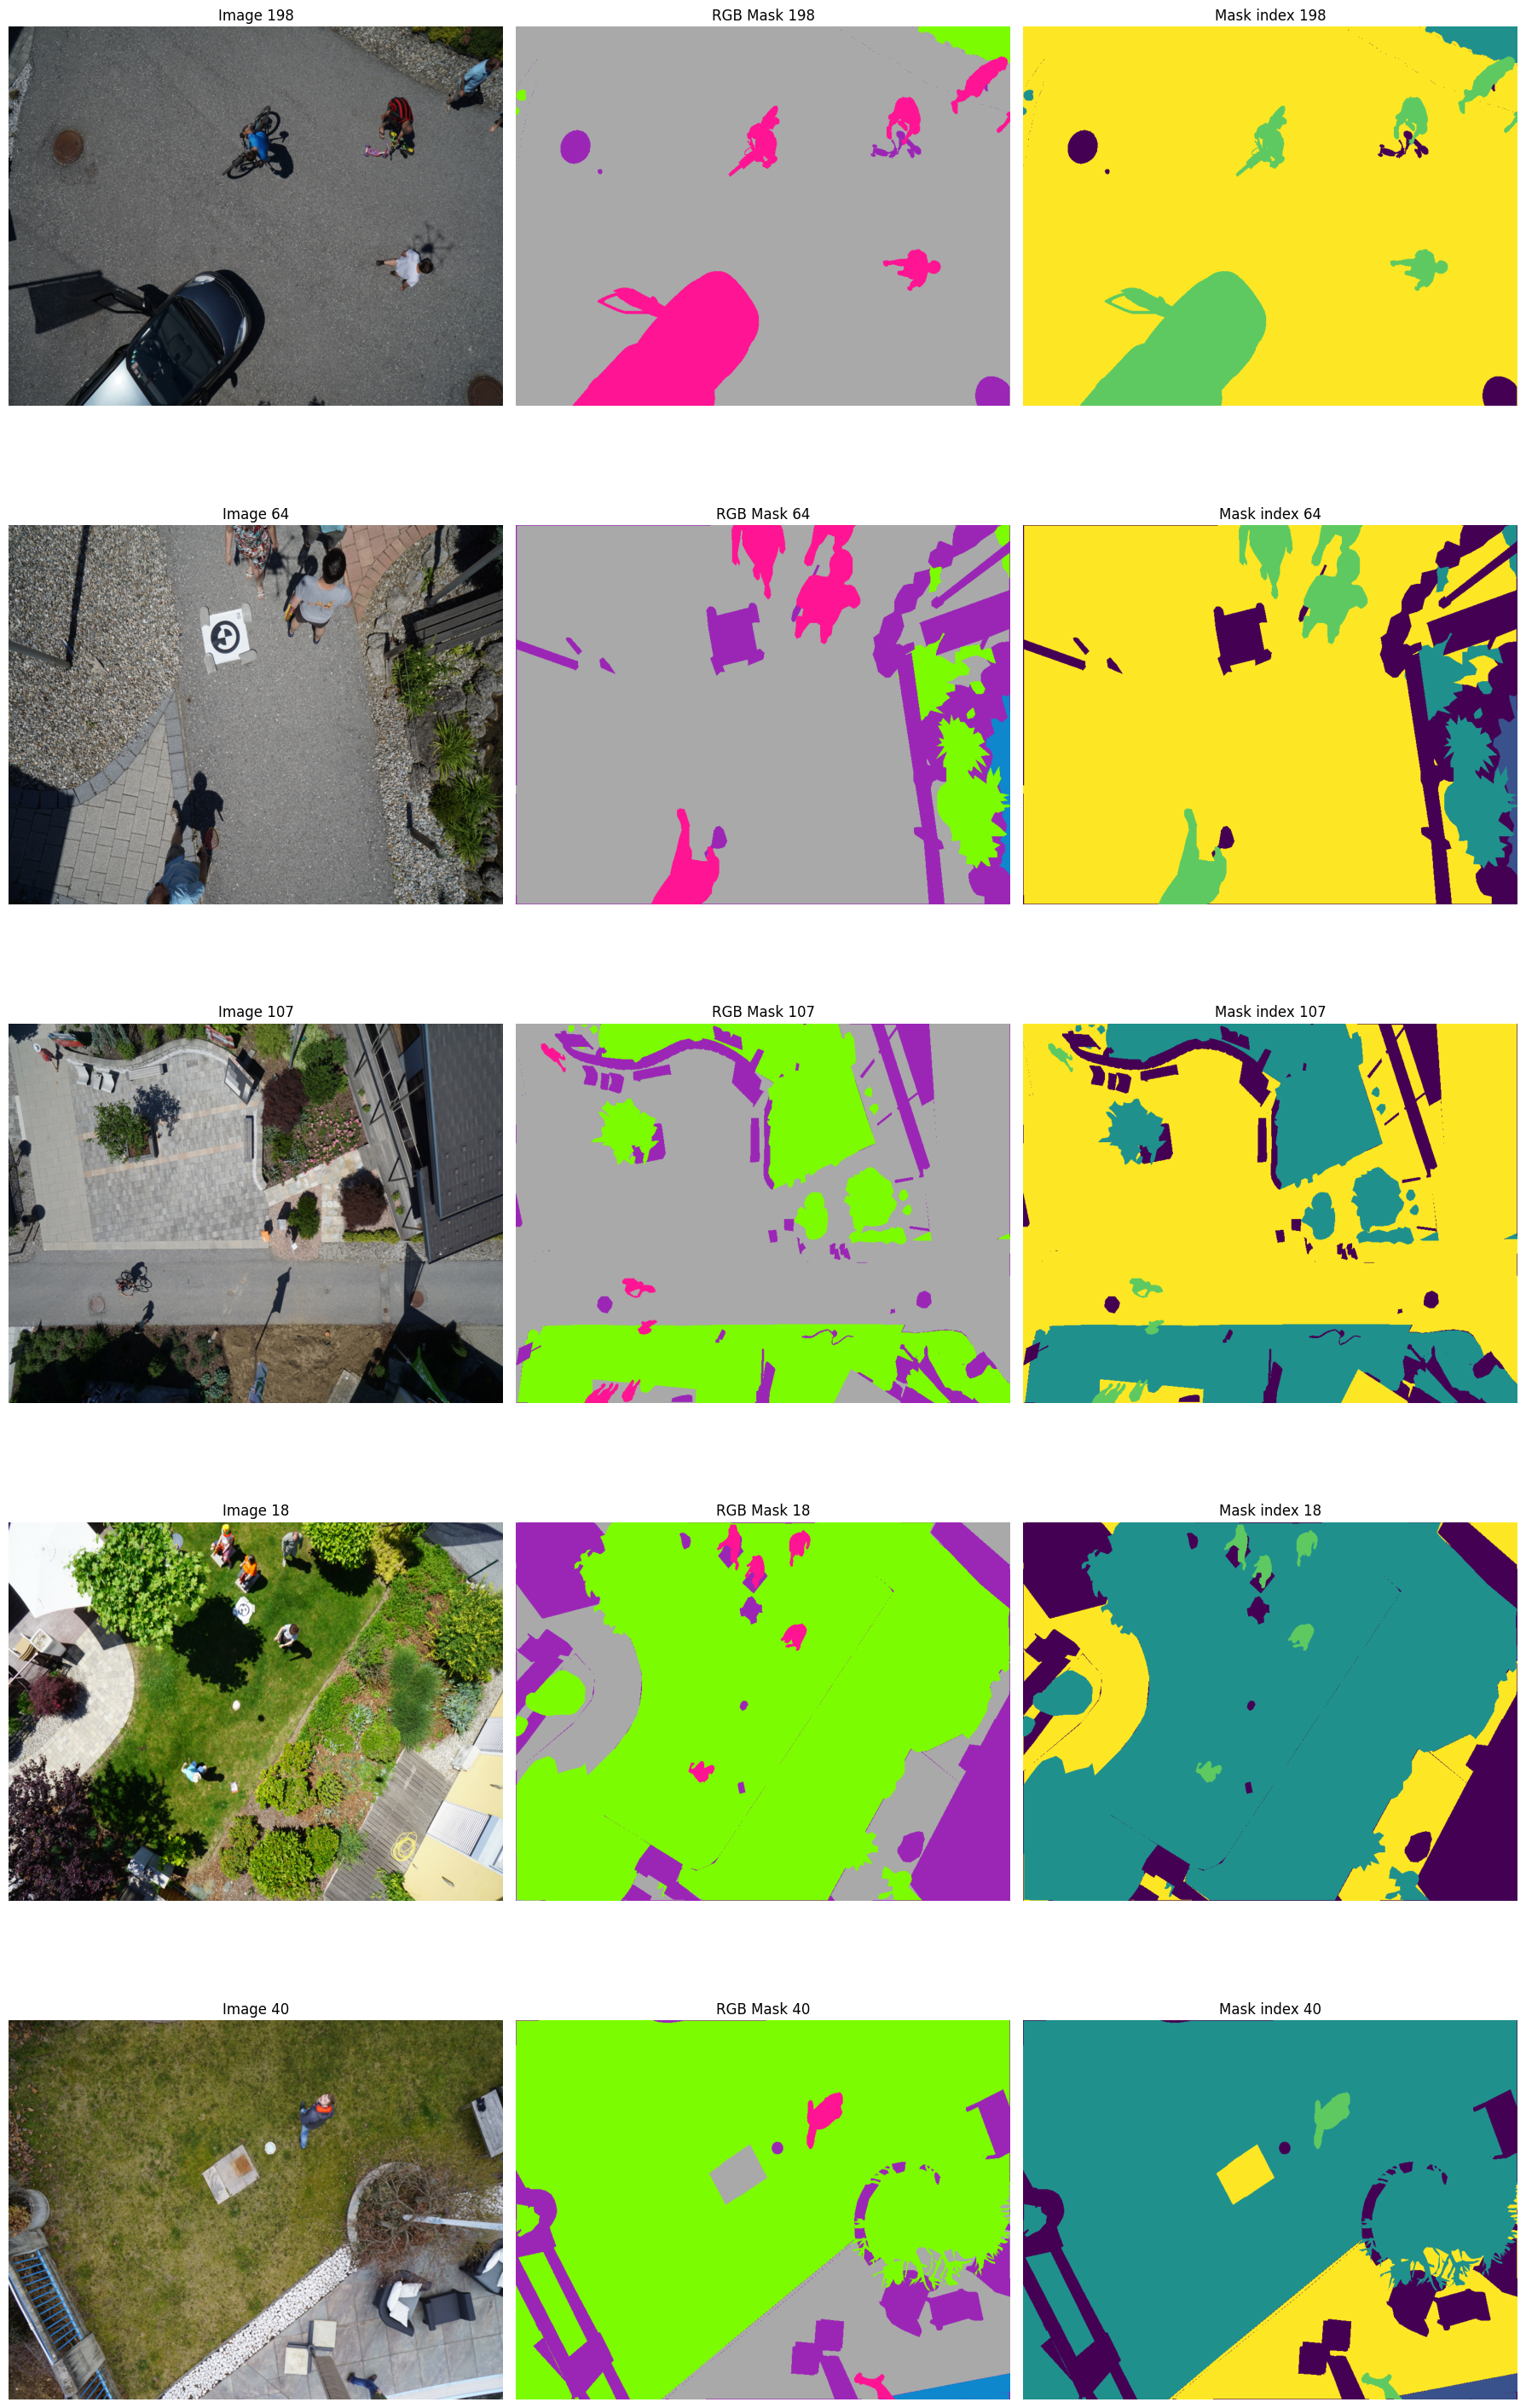

In [ ]:
def plot_samples(n_samples: int = 5) -> None:
    random_indices: np.ndarray = np.random.choice(len(image_files), n_samples, replace=False)

    fig, ax = plt.subplots(n_samples, 3, figsize=(18, n_samples * 6))

    for i, idx in enumerate(random_indices):
        img_rgb = cv2.cvtColor(cv2.imread(image_files[idx]), cv2.COLOR_BGR2RGB)
        mask_bgr = cv2.imread(mask_files[idx])
        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)

        mask_index = convert_rgb_to_index_mask(mask_rgb)

        ax[i, 0].imshow(img_rgb)
        ax[i, 0].set_title(f"Image {idx}")
        ax[i, 0].axis("off")

        ax[i, 1].imshow(mask_rgb)
        ax[i, 1].set_title(f"RGB Mask {idx}")
        ax[i, 1].axis("off")

        ax[i, 2].imshow(mask_index, cmap="viridis", vmin=0, vmax=4)
        ax[i, 2].set_title(f"Mask index {idx}")
        ax[i, 2].axis("off")

    plt.tight_layout()
    plt.show()


# `convert_rgb_to_index_mask` function must be defined to use this function
try:
    plot_samples(n_samples=5)
except Exception:
    print("Failed to plot examples.")
    print("Remember to define a `convert_rgb_to_index_mask` function in the notebook.")

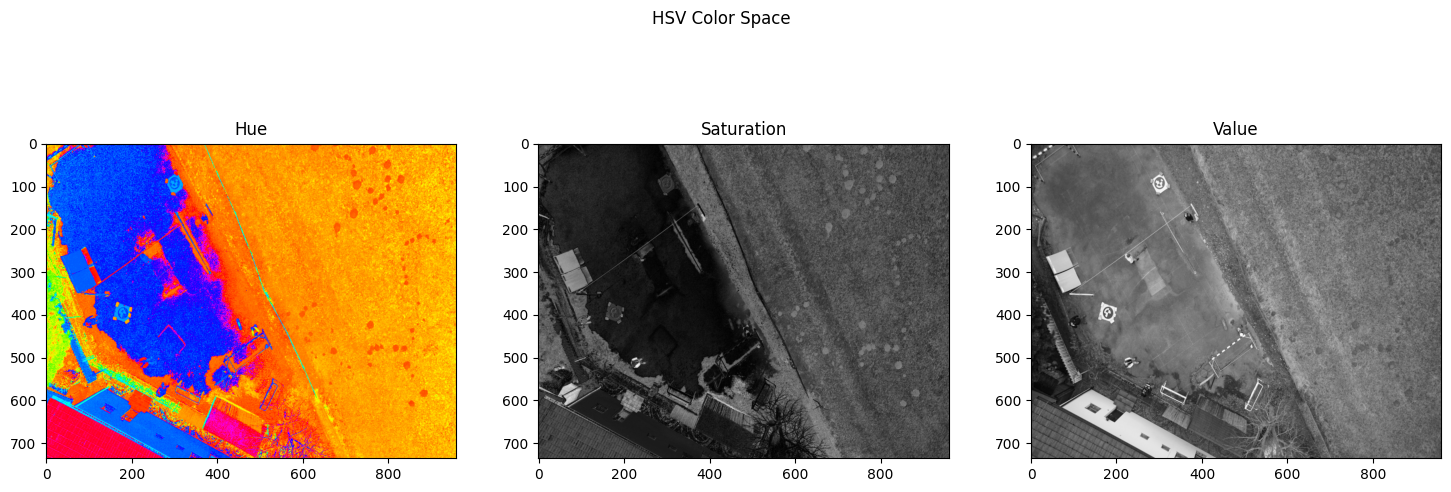

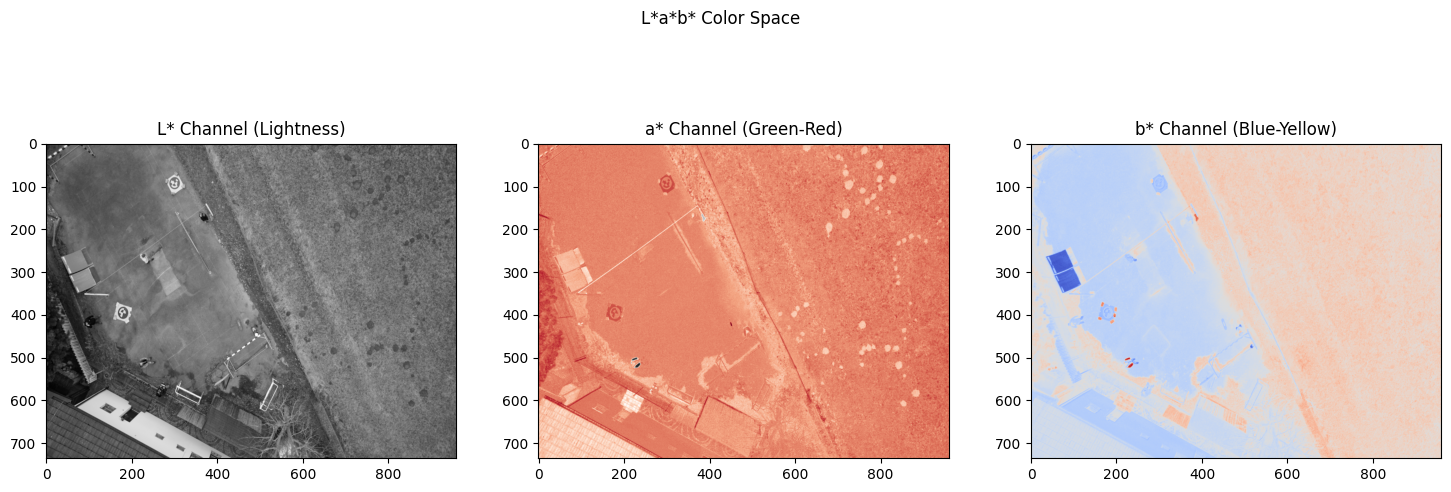

In [ ]:
# --- Color Space Analysis ---
# (Make sure you have an 'img_rgb' sample loaded)

img_hsv: np.array = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_lab: np.array = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

# Plot the channels side-by-side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(img_hsv[:, :, 0], cmap="hsv")
ax[0].set_title("Hue")
ax[1].imshow(img_hsv[:, :, 1], cmap="gray")
ax[1].set_title("Saturation")
ax[2].imshow(img_hsv[:, :, 2], cmap="gray")
ax[2].set_title("Value")
plt.suptitle("HSV Color Space")
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(img_lab[:, :, 0], cmap="gray")
ax[0].set_title("L* Channel (Lightness)")
ax[1].imshow(img_lab[:, :, 1], cmap="RdGy")
ax[1].set_title("a* Channel (Green-Red)")
ax[2].imshow(img_lab[:, :, 2], cmap="coolwarm")
ax[2].set_title("b* Channel (Blue-Yellow)")
plt.suptitle("L*a*b* Color Space")
plt.show()

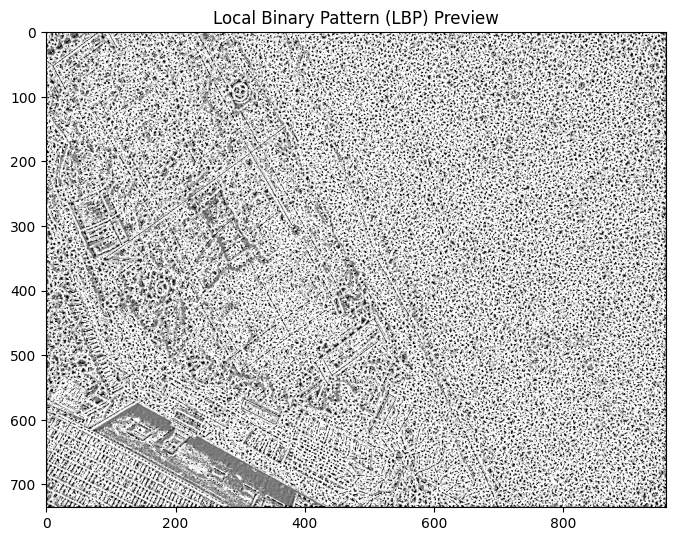

In [ ]:
from skimage.feature import local_binary_pattern

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# --- LBP Example ---
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(img_gray, n_points, radius, method="uniform")

plt.figure(figsize=(8, 8))
plt.imshow(lbp, cmap="gray")
plt.title("Local Binary Pattern (LBP) Preview")
plt.show()